# Multi-Class Prediction of Obesity Risk

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
%matplotlib inline

In [ ]:
# Load data
data = pd.read_csv("ObesityDataSet.csv")  # Replace with your data file path

In [ ]:
print("\nStatistical Summary:")
display(data.describe(include='all'))

In [ ]:
# Display the first few rows of the dataset
print("Preview of the Dataset:")
display(data.head())

In [ ]:
# Step 3: Basic Information about the Dataset
print("\nDataset Information:")
data.info()

In [ ]:
print("\nStatistical Summary:")
display(data.describe(include='all'))

In [ ]:
# Step 4: Check for Missing Values
print("\nMissing Values Count:")
missing_values = data.isnull().sum()
display(missing_values)

In [ ]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='plasma')
plt.title("Missing Data Heatmap")
plt.show()

In [ ]:
# Step 5: Check Data Types
print("\nData Types:")
print(data.dtypes)

In [ ]:
# Step 6: Analyze Categorical Variables
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("\nCategorical Variables Analysis:")
for col in categorical_cols:
    print(f"\n{col} Value Counts:")
    display(data[col].value_counts())

In [ ]:
# Step 7: Analyze Numerical Variables
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Variables Analysis:")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# Step 8: Check for Outliers
print("\nOutliers Analysis:")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [ ]:
# Step 9: Correlation Analysis
print("\nCorrelation Matrix:")
corr_matrix = filtered_data.corr() # used filtered_data rather that data due to data containing a column with object datatype
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Step 10: Relationship Between Variables
print("\nPairplot for Numerical Variables:")
sns.pairplot(data[numerical_cols])
plt.show()

In [ ]:
## Key Observations 
### 1. Dataset Overview
-

### 2. Missing Data
- No missing data

### 3. Numerical Variables

In [2]:
df = pd.read_csv("Data/playground-series-s4e2/train.csv")
df_test = pd.read_csv("Data/playground-series-s4e2/test.csv")
df = df.drop('id', axis=1)
test_id = df_test['id']
df_test = df_test.drop('id',axis = 1)

In [3]:
test_id.info

<bound method Series.info of 0        20758
1        20759
2        20760
3        20761
4        20762
         ...  
13835    34593
13836    34594
13837    34595
13838    34596
13839    34597
Name: id, Length: 13840, dtype: int64>

In [5]:
df_test

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [6]:
test_id 

0        20758
1        20759
2        20760
3        20761
4        20762
         ...  
13835    34593
13836    34594
13837    34595
13838    34596
13839    34597
Name: id, Length: 13840, dtype: int64

In [7]:
df.info

<bound method DataFrame.info of        Gender        Age    Height      Weight family_history_with_overweight  \
0        Male  24.443011  1.699998   81.669950                            yes   
1      Female  18.000000  1.560000   57.000000                            yes   
2      Female  18.000000  1.711460   50.165754                            yes   
3      Female  20.952737  1.710730  131.274851                            yes   
4        Male  31.641081  1.914186   93.798055                            yes   
...       ...        ...       ...         ...                            ...   
20753    Male  25.137087  1.766626  114.187096                            yes   
20754    Male  18.000000  1.710000   50.000000                             no   
20755    Male  20.101026  1.819557  105.580491                            yes   
20756    Male  33.852953  1.700000   83.520113                            yes   
20757    Male  26.680376  1.816547  118.134898                            yes

In [8]:
df_test.info

<bound method DataFrame.info of        Gender        Age    Height      Weight family_history_with_overweight  \
0        Male  26.899886  1.848294  120.644178                            yes   
1      Female  21.000000  1.600000   66.000000                            yes   
2      Female  26.000000  1.643355  111.600553                            yes   
3        Male  20.979254  1.553127  103.669116                            yes   
4      Female  26.000000  1.627396  104.835346                            yes   
...       ...        ...       ...         ...                            ...   
13835    Male  23.327836  1.721384   78.030383                            yes   
13836  Female  29.000000  1.590000   62.000000                             no   
13837  Female  22.935612  1.585547   44.376637                             no   
13838    Male  21.000000  1.620000   53.000000                            yes   
13839    Male  26.490926  1.812259  120.980508                            yes

In [9]:
df.nunique()

Gender                               2
Age                               1703
Height                            1833
Weight                            1979
family_history_with_overweight       2
FAVC                                 2
FCVC                               934
NCP                                689
CAEC                                 4
SMOKE                                2
CH2O                              1506
SCC                                  2
FAF                               1360
TUE                               1297
CALC                                 3
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [10]:
df_test.nunique()

Gender                               2
Age                               1539
Height                            1739
Weight                            1798
family_history_with_overweight       2
FAVC                                 2
FCVC                               828
NCP                                649
CAEC                                 4
SMOKE                                2
CH2O                              1366
SCC                                  2
FAF                               1260
TUE                               1172
CALC                                 4
MTRANS                               5
dtype: int64

In [11]:
categorical_columns = df.select_dtypes(include = ['object'])
categorical_columns.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [12]:
categorical_columns_test = df_test.select_dtypes(include = ['object'])
categorical_columns_test.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [13]:
df['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [14]:
target_dictionary = {'Insufficient_Weight': '0',
                     'Normal_Weight': '1',
                     'Overweight_Level_I': '2',
                      'Overweight_Level_II': '3',
                     'Obesity_Type_I': '4',
                     'Obesity_Type_II': '5',
                     'Obesity_Type_III': '6'
                    }

In [15]:
target_dictionary

{'Insufficient_Weight': '0',
 'Normal_Weight': '1',
 'Overweight_Level_I': '2',
 'Overweight_Level_II': '3',
 'Obesity_Type_I': '4',
 'Obesity_Type_II': '5',
 'Obesity_Type_III': '6'}

In [16]:
df['NObeyesdad'] = df['NObeyesdad'].replace(target_dictionary).astype('int64')
df['NObeyesdad'].unique()

array([3, 1, 0, 6, 5, 2, 4], dtype=int64)

In [17]:
df['MTRANS'].nunique()
df['MTRANS'].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike'], dtype=object)

In [18]:
df['MTRANS'].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike'], dtype=object)

In [19]:
df_test['MTRANS'].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Bike',
       'Motorbike'], dtype=object)

In [20]:
target_dictionary = { 'Bike': '0', 
                         'Walking': '1',
                    'Motorbike': '2',
                       'Automobile' : '3',
                     'Public_Transportation' : '4'                      
                    }

In [21]:
df['MTRANS'] = df['MTRANS'].replace(target_dictionary).astype(int)
df['MTRANS'].unique()

array([4, 3, 1, 2, 0])

In [22]:
df_test['MTRANS'] = df['MTRANS'].replace(target_dictionary).astype(int)
df_test['MTRANS'].unique()

array([4, 3, 1, 2, 0])

In [23]:
df['CALC'].unique()

array(['Sometimes', 'no', 'Frequently'], dtype=object)

In [24]:
df_test['CALC'].unique()

array(['Sometimes', 'no', 'Frequently', 'Always'], dtype=object)

In [25]:
target_dictionary = { 'Frequently': '0', 
                        'Sometimes' : '1',
                          'no': '2',
                         'Always': '3'
                                    
                    }


In [26]:
target_dictionary

{'Frequently': '0', 'Sometimes': '1', 'no': '2', 'Always': '3'}

In [27]:
df['CALC'] = df['CALC'].replace(target_dictionary).astype(int)
df['CALC'].unique()

array([1, 2, 0])

In [28]:
df_test['CALC'] = df_test['CALC'].replace(target_dictionary).astype(int)
df_test['CALC'].unique()

array([1, 2, 0, 3])

In [29]:
categorical_columns = df.select_dtypes(include = ['object'])
categorical_columns.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC'],
      dtype='object')

In [30]:
categorical_columns_test = df_test.select_dtypes(include = ['object'])
categorical_columns_test.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC'],
      dtype='object')

In [31]:
df =pd.get_dummies(df)
df_test =pd.get_dummies(df_test)

In [32]:
df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC',
       'MTRANS', 'NObeyesdad', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes'],
      dtype='object')

In [33]:
df_test.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC',
       'MTRANS', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes'],
      dtype='object')

In [34]:

df = df.drop(columns =['Gender_Male','family_history_with_overweight_no', 'family_history_with_overweight_yes', 'FAVC_no','SMOKE_no' ,'SCC_no'])

In [35]:
df_test = df_test.drop(columns =['Gender_Male','family_history_with_overweight_no', 'family_history_with_overweight_yes', 'FAVC_no','SMOKE_no' ,'SCC_no'])

In [36]:
df_test

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CALC,MTRANS,Gender_Female,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,1,4,False,True,False,False,True,False,False,False
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1,3,True,True,False,False,True,False,False,False
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,1,4,True,True,False,False,True,False,False,False
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,1,4,False,True,False,False,True,False,False,False
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,1,4,True,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,1,4,False,False,False,False,True,False,False,False
13836,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1,4,True,True,False,False,True,False,False,False
13837,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,1,4,True,True,False,True,False,False,False,False
13838,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2,4,False,True,False,False,True,False,False,False


In [37]:
df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC',
       'MTRANS', 'NObeyesdad', 'Gender_Female', 'FAVC_yes', 'CAEC_Always',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes'],
      dtype='object')

In [38]:
df_test.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC',
       'MTRANS', 'Gender_Female', 'FAVC_yes', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes'],
      dtype='object')

In [39]:
df.info

<bound method DataFrame.info of              Age    Height      Weight      FCVC       NCP      CH2O  \
0      24.443011  1.699998   81.669950  2.000000  2.983297  2.763573   
1      18.000000  1.560000   57.000000  2.000000  3.000000  2.000000   
2      18.000000  1.711460   50.165754  1.880534  1.411685  1.910378   
3      20.952737  1.710730  131.274851  3.000000  3.000000  1.674061   
4      31.641081  1.914186   93.798055  2.679664  1.971472  1.979848   
...          ...       ...         ...       ...       ...       ...   
20753  25.137087  1.766626  114.187096  2.919584  3.000000  2.151809   
20754  18.000000  1.710000   50.000000  3.000000  4.000000  1.000000   
20755  20.101026  1.819557  105.580491  2.407817  3.000000  2.000000   
20756  33.852953  1.700000   83.520113  2.671238  1.971472  2.144838   
20757  26.680376  1.816547  118.134898  3.000000  3.000000  2.003563   

            FAF       TUE  CALC  MTRANS  NObeyesdad  Gender_Female  FAVC_yes  \
0      0.000000  0.9764

In [40]:
df['BMI_Sqrt'] = ((df['Weight']) **.5) / (df['Height']**1)
df['BMI_Sqrt'].value_counts()

BMI_Sqrt
4.159452    191
5.261336    179
5.420771    148
5.094267    139
5.164568    122
           ... 
6.328291      1
5.715166      1
4.232225      1
6.643650      1
5.983323      1
Name: count, Length: 12609, dtype: int64

In [41]:
df_test['BMI_Sqrt'] = ((df_test['Weight']) **.5) / (df_test['Height']**1)
df_test['BMI_Sqrt'].value_counts()

BMI_Sqrt
4.159452    143
5.420771    122
5.261336    115
5.195153     73
5.094267     70
           ... 
4.221745      1
5.624201      1
6.518665      1
6.020288      1
6.069284      1
Name: count, Length: 8891, dtype: int64

# Correlation Matrix

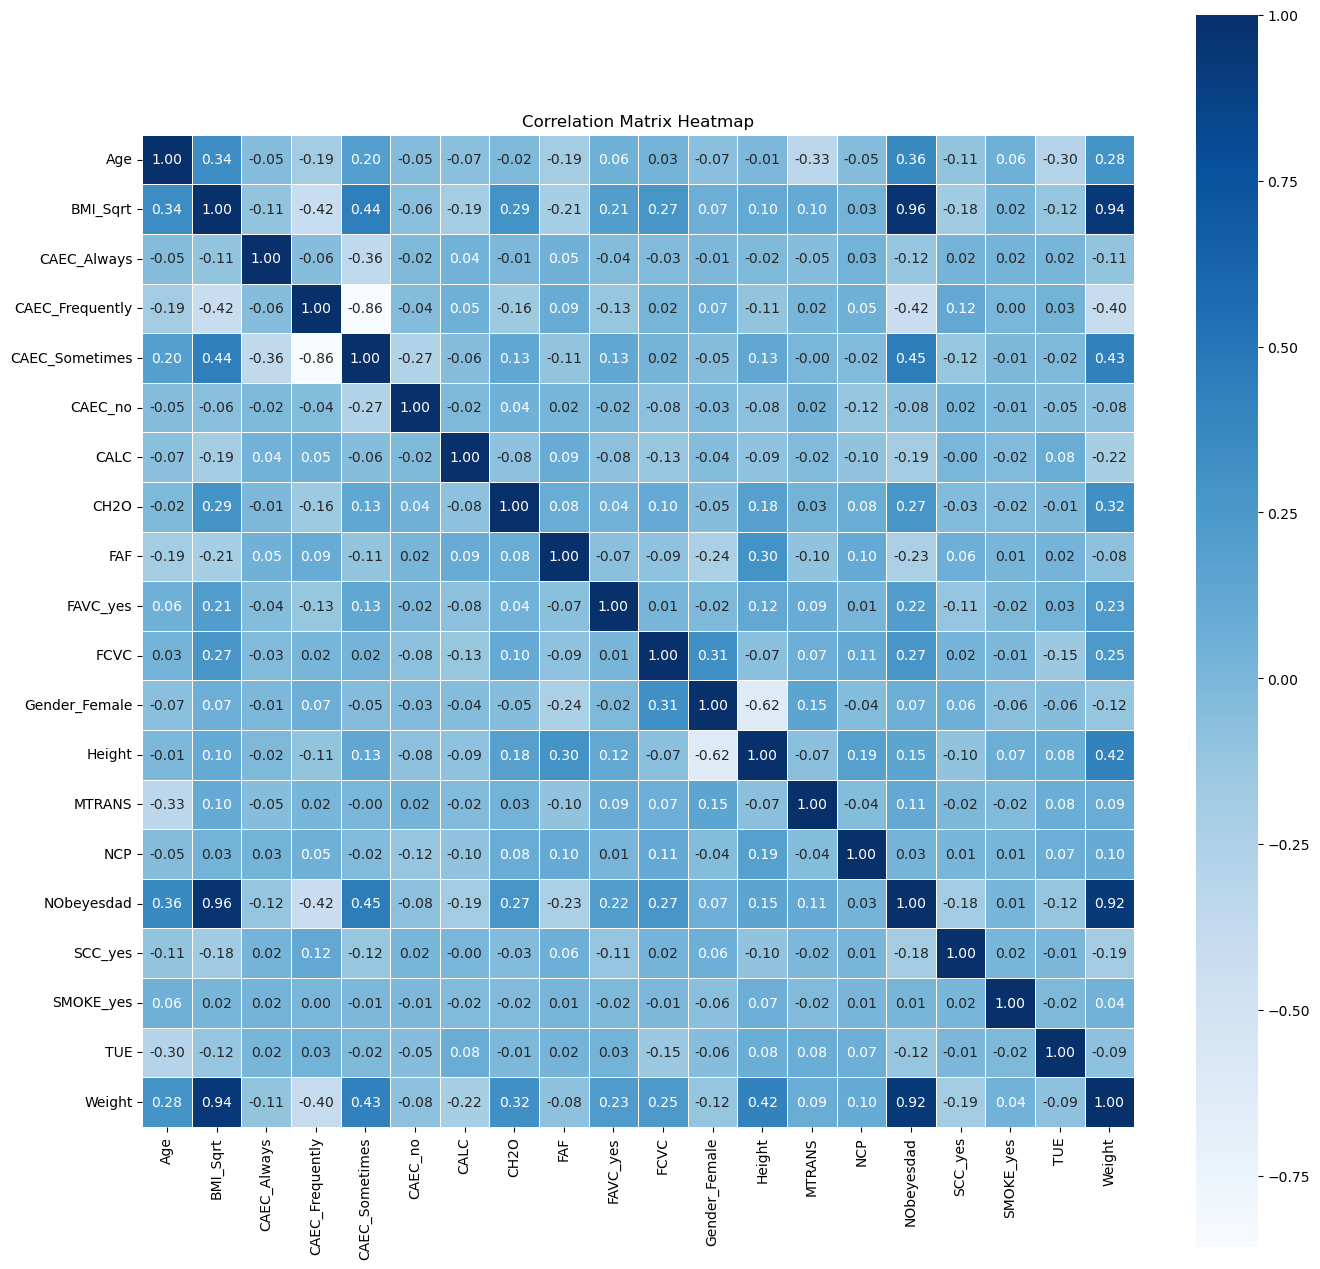

In [42]:
df = df.astype(float)
df_test = df_test.astype(float)

corr_matrix = df.corr()
#sort the correlation matrix to the column interest
sorted_correlation = corr_matrix['NObeyesdad'].sort_index(ascending = True)

#extract the columns in order of their correlation
correlated_columns = sorted_correlation.index

#create a subset of the correlation matrix
subset_corr_matrix = corr_matrix.loc[correlated_columns, correlated_columns ]

#Plot
plt.figure(figsize=(16,16))
#Heatmap
sns.heatmap(subset_corr_matrix, annot=True, cmap='Blues', linewidths=0.6, fmt=".2f", square=True)

#title
plt.title("Correlation Matrix Heatmap")
#show Plot
plt.show()

In [43]:
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,BMI_Sqrt
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,1.0,4.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.315973
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.0,3.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.839637
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,2.0,4.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.138442
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,1.0,4.0,6.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.697447
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,1.0,4.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.059560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,1.0,4.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.048726
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,1.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.135127
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,2.0,4.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.647109
20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834,2.0,3.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.375843


In [63]:
# 1. Load data 
train_data = df
test_data = df_test

# 2. Separate features (X) and target variable (y) for training data
X_train = train_data.drop('NObeyesdad', axis=1)
y_train = train_data['NObeyesdad']

# 3. Train-test split (optional, for validation on training data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 4. Train the model
model = LogisticRegression(solver="lbfgs")
model.fit(X_train, y_train)

# 5. Make predictions on test set
y_pred = model.predict(test_data)

# 6. Prepare submission DataFrame (assuming 'id' is the test set ID column)
submission_df = pd.DataFrame({'id': test_id, 'NObeyesdad': y_pred})
# Replace
target_dictionary = {0: 'Insufficient_Weight',
                     1: 'Normal_Weight',
                     2: 'Overweight_Level_I',
                      3: 'Overweight_Level_II',
                     4: 'Obesity_Type_I',
                     5: 'Obesity_Type_II',
                     6: 'Obesity_Type_III'
                    }

submission_df['NObeyesdad'] = submission_df['NObeyesdad'].replace(target_dictionary)
# 7. Save the submission file as CSV (replace with your desired filename)
submission_df.to_csv('LogisticRegressionsubmission.csv', index=False)

# 8. Submit the 'submission.csv' file to the Kaggle competition

In [53]:
test_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CALC,MTRANS,Gender_Female,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,BMI_Sqrt
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,1.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.942677
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.077524
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.428384
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,1.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.555680
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.291593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,1.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.131615
13836,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.952206
13837,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.201439
13838,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.493895


In [ ]:

# 1. Load data (replace with your paths)
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# 2. Separate features (X) and target variable (y) for training data
X_train = train_data.drop('ObesityLevel', axis=1)  # Assuming 'ObesityLevel' is the target column
y_train = train_data['ObesityLevel']

# 3. Train-test split (optional, for validation on training data)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 4. Train the model
model = LogisticRegression(solver="lbfgs")
model.fit(X_train, y_train)

# 5. Make predictions on test set
y_pred = model.predict(test_data)

# 6. Prepare submission DataFrame (assuming 'id' is the test set ID column)
submission_df = pd.DataFrame({'id': test_data['id'], 'target': y_pred})

# 7. Save the submission file as CSV (replace with your desired filename)
submission_df.to_csv('submission.csv', index=False)

# 8. Submit the 'submission.csv' file to the Kaggle competition

In [47]:
print(len(y_pred))
print(len(test_id))


4152
13840


0        20758
1        20759
2        20760
3        20761
4        20762
         ...  
13835    34593
13836    34594
13837    34595
13838    34596
13839    34597
Name: id, Length: 13840, dtype: int64

# Classification Report

In [63]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78       524
         1.0       0.59      0.59      0.59       626
         2.0       0.49      0.45      0.47       484
         3.0       0.50      0.38      0.43       514
         4.0       0.54      0.57      0.56       543
         5.0       0.89      0.88      0.89       657
         6.0       0.87      0.99      0.93       804

    accuracy                           0.70      4152
   macro avg       0.66      0.67      0.66      4152
weighted avg       0.68      0.70      0.69      4152

The accuracy for the model is 69.63 %


# Logistic Regression Accuracy

In [66]:
print("The accuracy for the model is {} %".format(round(100*accuracy_score(y_pred,y_test),2)))

The accuracy for the model is 69.63 %


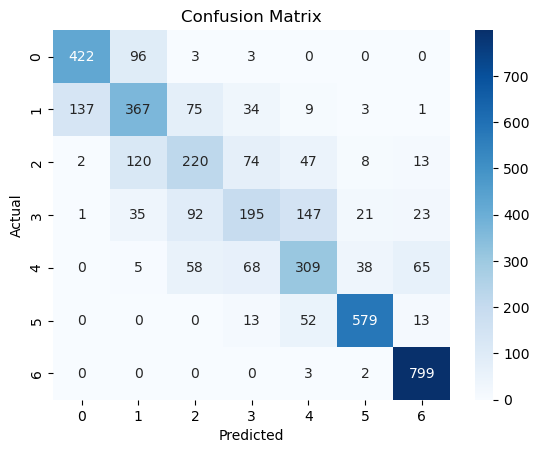

In [64]:
# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Linear Discriminant Analysis (LDA)

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create and fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lda.predict(test_data)

# 6. Prepare submission DataFrame (assuming 'id' is the test set ID column)
submission_df = pd.DataFrame({'id': test_id, 'NObeyesdad': y_pred})
# Replace
target_dictionary = {0: 'Insufficient_Weight',
                     1: 'Normal_Weight',
                     2: 'Overweight_Level_I',
                      3: 'Overweight_Level_II',
                     4: 'Obesity_Type_I',
                     5: 'Obesity_Type_II',
                     6: 'Obesity_Type_III'
                    }

submission_df['NObeyesdad'] = submission_df['NObeyesdad'].replace(target_dictionary)
# 7. Save the submission file as CSV (replace with your desired filename)
submission_df.to_csv('LDAsubmission.csv', index=False)


In [71]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy for the model is {} %".format(round(100*accuracy_score(y_pred,y_test),2)))



The accuracy for the model is 83.55 %


In [69]:
# Print classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       524
         1.0       0.85      0.71      0.77       626
         2.0       0.67      0.71      0.69       484
         3.0       0.67      0.67      0.67       514
         4.0       0.79      0.77      0.78       543
         5.0       0.93      0.95      0.94       657
         6.0       0.99      1.00      0.99       804

    accuracy                           0.84      4152
   macro avg       0.82      0.82      0.82      4152
weighted avg       0.84      0.84      0.83      4152



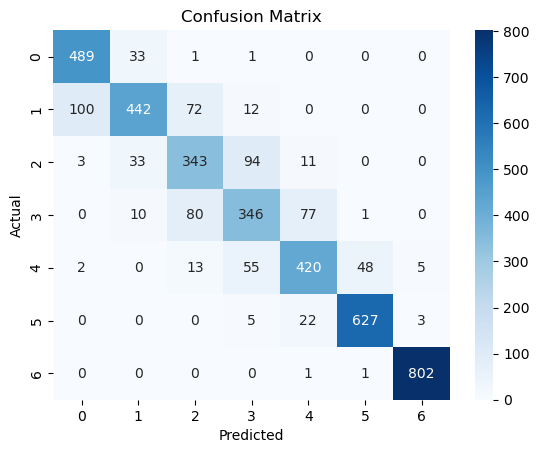

In [70]:
# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Interpretation: Examine discriminant function weights to identify important features.

# Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB

# Create and fit the naïve Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb.predict(test_data)

#  Prepare submission DataFrame (assuming 'id' is the test set ID column)
submission_df = pd.DataFrame({'id': test_id, 'NObeyesdad': y_pred})
# Replace
target_dictionary = {0: 'Insufficient_Weight',
                     1: 'Normal_Weight',
                     2: 'Overweight_Level_I',
                      3: 'Overweight_Level_II',
                     4: 'Obesity_Type_I',
                     5: 'Obesity_Type_II',
                     6: 'Obesity_Type_III'
                    }

submission_df['NObeyesdad'] = submission_df['NObeyesdad'].replace(target_dictionary)
#  Save the submission file as CSV (replace with your desired filename)
submission_df.to_csv('NaiveBayessubmission.csv', index=False)

In [74]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy for the model is {} %".format(round(100*accuracy_score(y_pred,y_test),2)))


The accuracy for the model is 73.87 %


In [75]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.94      0.84       524
         1.0       0.76      0.60      0.67       626
         2.0       0.69      0.28      0.40       484
         3.0       0.48      0.61      0.54       514
         4.0       0.60      0.60      0.60       543
         5.0       0.80      0.95      0.87       657
         6.0       0.95      1.00      0.97       804

    accuracy                           0.74      4152
   macro avg       0.72      0.71      0.70      4152
weighted avg       0.74      0.74      0.72      4152



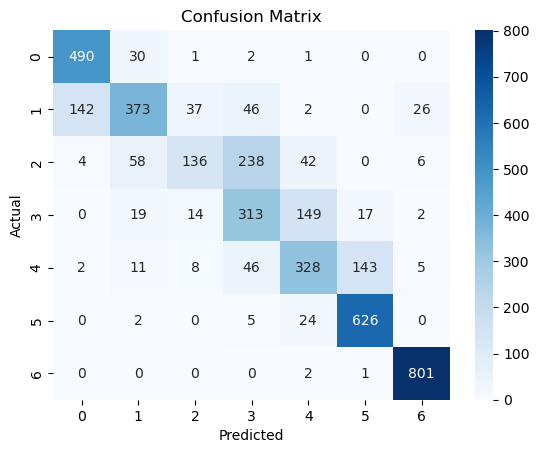

In [76]:
# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Interpretation: Examine discriminant function weights to identify important features.

# Support Vector Machine (SVM)

In [68]:
from sklearn.svm import SVC

# Create and fit the SVM model (consider hyperparameter tuning)
svm = SVC(kernel="linear")  # Linear kernel for interpretability
svm.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm.predict(test_data)

#  Prepare submission DataFrame (assuming 'id' is the test set ID column)
submission_df = pd.DataFrame({'id': test_id, 'NObeyesdad': y_pred})
# Replace
target_dictionary = {0: 'Insufficient_Weight',
                     1: 'Normal_Weight',
                     2: 'Overweight_Level_I',
                      3: 'Overweight_Level_II',
                     4: 'Obesity_Type_I',
                     5: 'Obesity_Type_II',
                     6: 'Obesity_Type_III'
                    }

submission_df['NObeyesdad'] = submission_df['NObeyesdad'].replace(target_dictionary)
#  Save the submission file as CSV (replace with your desired filename)
submission_df.to_csv('SVMsubmission.csv', index=False)

In [78]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy for the model is {} %".format(round(100*accuracy_score(y_pred,y_test),2)))


The accuracy for the model is 87.16 %


In [79]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       524
         1.0       0.87      0.81      0.84       626
         2.0       0.73      0.74      0.73       484
         3.0       0.73      0.70      0.72       514
         4.0       0.83      0.84      0.83       543
         5.0       0.96      0.97      0.96       657
         6.0       1.00      1.00      1.00       804

    accuracy                           0.87      4152
   macro avg       0.86      0.86      0.86      4152
weighted avg       0.87      0.87      0.87      4152



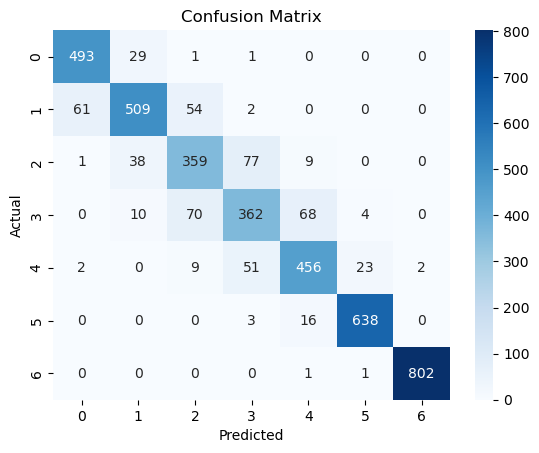

In [80]:
# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()